# CIS 9660 – FINAL PROJECT – Twitter Sentiment Analysis 

## _By David Arizmendi, Macrin Francis, Stylianos Markou, and Juliocarlos Velez_


## Loading Packages

A big thank you to the people from these following links as they provided the basis for the code that we used to pull tweets and come up with a few of our analysis

https://www.youtube.com/watch?v=nla4C-VYNEU, 
https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk, 
https://towardsdatascience.com/selenium-tweepy-to-scrap-tweets-from-tweeter-and-analysing-sentiments-1804db3478ac,
https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a







In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords, twitter_samples
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


# To consume Twitter's API
!pip3 install tweepy
import tweepy
from tweepy import OAuthHandler 
from wordcloud import WordCloud
# To identify the sentiment of text
!pip install -U textblob
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline
!pip install xgboost
import sklearn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import xgboost as xgb

# to use iplot
# conda install -c conda-forge cufflinks-py
!pip install cufflinks
# trouble shoot:       https://stackoverflow.com/questions/55132071/series-object-has-no-attribute-iplot/55132247
#                                      https://stackoverflow.com/questions/50713726/how-to-install-cufflinks-in-python3

import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import iplot

import nltk
nltk.download('twitter_samples')

Requirement already up-to-date: textblob in c:\users\stelios\anaconda3\lib\site-packages (0.15.3)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stelios\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stelios\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Stelios\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Stelios\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Stelios\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Stelios\AppData\Roaming\nltk_data...
[nltk_data]   Package 

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=adda666a031979322611f923bf1df9ba6ded5a6f757698d20149e86e12dec123
  Stored in directory: c:\users\stelios\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=0fba0284034849fdbb314e9f5194a34fcedf7df7643ed0469801923920905e12
  Stored in directory: c:\users\stelios\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built cufflinks retrying


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Stelios\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

## Getting 10,000 Labeled Tweets from NLTK Library

In [3]:
# Create variables for three datasets from NLTK that contain various tweets to train and test the model
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
#making the positive_tweets json into DF 
df_test = pd.DataFrame.from_records(positive_tweets)
pos_tweets_data = df_test.apply(pd.Series)
pos_tweets_data
pos_tweets_data['Merge'] = pos_tweets_data[pos_tweets_data.columns[1:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)
pos_tweets_data_df = pos_tweets_data.Merge
pos_tweets_data_df = pd.DataFrame(pos_tweets_data_df)
#making the negative_tweets json into DF 
df_test = pd.DataFrame.from_records(negative_tweets)
neg_tweets_data = df_test.apply(pd.Series)
neg_tweets_data
neg_tweets_data['Merge'] = neg_tweets_data[neg_tweets_data.columns[1:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)
neg_tweets_data_df = neg_tweets_data.Merge
neg_tweets_data_df = pd.DataFrame(neg_tweets_data_df)
#add labels to the DF then merge them together and shuffle
pos_tweets_data_df['label'] = 1
neg_tweets_data_df['label'] = 0
NLTK_tweets_df = pd.concat( [neg_tweets_data_df, pos_tweets_data_df], ignore_index=True)
NLTK_tweets_df = NLTK_tweets_df.sample(frac=1).reset_index(drop=True)
NLTK_tweets_df.columns =['tweet', 'label']

In [5]:
NLTK_tweets_df.head()

,tweet,label
0,AlyssaC_HK I use Chrome :),1
1,Michael37311757 @royjohnwatts @LBC @darrenadam...,1
2,"matteomeacci Well, they say Europe is on the r...",1
3,jaimeemelanie_ lmaoo! The best songs ever &lt;...,1
4,LouiseMillerx @RedShoes4Life @x_Kisaragi @Dayv...,0


## Using Twitter API to pull the tweets

In [6]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


class TwitterClient(object): 
    def __init__(self): 
        #Initialization method. 
        try: 
            # create OAuthHandler object 
            auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            # add hyper parameter 'proxy' if executing from behind proxy "proxy='http://172.22.218.218:8085'"
            self.api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            
        except tweepy.TweepError as e:
            print(f"Error: Tweeter Authentication Failed - \n{str(e)}")

    def get_tweets(self, query, maxTweets = 1000):
        #Function to fetch tweets. 
        # empty list to store parsed tweets 
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 100

        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry)
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break

                for tweet in new_tweets:
                    parsed_tweet = {} 
                    parsed_tweet['tweet'] = tweet.text 

                    # appending parsed tweet to tweets list 
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                            tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet) 
                        
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                # Just exit if any error
                print("Tweepy error : " + str(e))
                break
        
        return pd.DataFrame(tweets)

In [7]:
twitter_client = TwitterClient()
# calling function to get tweets
pulled_tweets_df = twitter_client.get_tweets('CUNY', maxTweets=15000)
print(f'tweets_df Shape - {pulled_tweets_df.shape}')
pulled_tweets_df.head(10)

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1600 tweets
Downloaded 1700 tweets
Downloaded 1800 tweets
Downloaded 1900 tweets
Downloaded 2000 tweets
Downloaded 2100 tweets
Downloaded 2200 tweets
Downloaded 2300 tweets
Downloaded 2400 tweets
Downloaded 2500 tweets
Downloaded 2600 tweets
Downloaded 2700 tweets
Downloaded 2800 tweets
Downloaded 2900 tweets
Downloaded 3000 tweets
Downloaded 3100 tweets
Downloaded 3200 tweets
Downloaded 3300 tweets
Downloaded 3400 tweets
Downloaded 3500 tweets
Downloaded 3600 tweets
Downloaded 3700 tweets
Downloaded 3800 tweets
Downloaded 3900 tweets
Downloaded 4000 tweets
Downloaded 4100 tweets
Downloaded 4200 tweets
Downloaded 4300 tweets
Downloaded 4400 twee

,tweet
0,RT @steveperryonly: 📸 Photos taken by Daniel C...
1,RT @JointheBoycott: New Yorkers - want to do s...
2,.@Dianne4NYC begins first with three pillars: ...
3,Free #CUNY? One point for @Dianne4NYC!
4,RT @voteshekar: Our labor coalition keeps grow...
5,"Yes she said it! ""Make CUNY free"" let's gooooo..."
6,@J__Velasquez Transit. CUNY. Housing. Diversif...
7,"RT @PeterMoskos: Why, yes! There is a new Qual..."
8,"RT @ArtSciConnect: Just in: Mon, May 17 --&gt;..."
9,RT @EUStudiesCenter: We're looking forward to ...


In [8]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 1 if analysis.sentiment.polarity >= 0 else 0

In [9]:
sentiments_using_textblob = pulled_tweets_df.tweet.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,tweet
1,5743
0,350


In [10]:
pulled_tweets_df['label'] = sentiments_using_textblob
pulled_tweets_df.head()

,tweet,label
0,RT @steveperryonly: 📸 Photos taken by Daniel C...,1
1,RT @JointheBoycott: New Yorkers - want to do s...,1
2,.@Dianne4NYC begins first with three pillars: ...,1
3,Free #CUNY? One point for @Dianne4NYC!,1
4,RT @voteshekar: Our labor coalition keeps grow...,1


## Combining Dataset

In [11]:
pulled_tweets_df

,tweet,label
0,RT @steveperryonly: 📸 Photos taken by Daniel C...,1
1,RT @JointheBoycott: New Yorkers - want to do s...,1
2,.@Dianne4NYC begins first with three pillars: ...,1
3,Free #CUNY? One point for @Dianne4NYC!,1
4,RT @voteshekar: Our labor coalition keeps grow...,1
...,...,...
6088,저 제가 어린건 맞는데요\n그렇다고 반말들을 포지션도 아닌거같아요\n내가 너네집 딸...,1
6089,아니 나만 불쾌한가?\n치과 의사쌤 나한테 반말함 나는 존댓말 꼬박꼬박하는데,1
6090,@FRNKCASTIGLIONE who else would do such a thin...,1
6091,인스턴트 식품이 가끔은 땅기는 법이죠,1


In [12]:
NLTK_tweets_df

,tweet,label
0,AlyssaC_HK I use Chrome :),1
1,Michael37311757 @royjohnwatts @LBC @darrenadam...,1
2,"matteomeacci Well, they say Europe is on the r...",1
3,jaimeemelanie_ lmaoo! The best songs ever &lt;...,1
4,LouiseMillerx @RedShoes4Life @x_Kisaragi @Dayv...,0
...,...,...
9995,UrTypicalDragon @MC_Lindseyy yes jack i fuckin...,1
9996,ReflectMind @SidathSam :D so true.,1
9997,Afl2277 thanks. :),1
9998,herapy was so exhausting. \nI just want to lie...,0


In [13]:
combined_tweet_df = pd.concat( [pulled_tweets_df, NLTK_tweets_df], ignore_index=True)
# shuffle your dataframe in-place and reset the index
combined_tweet_df = combined_tweet_df.sample(frac=1).reset_index(drop=True)
tweets_df = combined_tweet_df
tweets_df

,tweet,label
0,ust a bit to big to scan so will add them to t...,1
1,ast night was one of the worst night :( I pret...,0
2,"RT @ARCCUNY: 📢📢Today (05/15) @ 4PM, Historian ...",1
3,대충 이 씨발롬이 하면서 뒤져라 읽다보면 보여....(?) https://t.co/...,1
4,o one is brave enough to watch all my snapchat...,0
...,...,...
16088,kkkk frends milte h break k bad :),1
16089,original post: https://t.co/Guuj7wCGx7,1
16090,글게\n모수씨 ㅎㅇ https://t.co/N5GiZpkovj,1
16091,RT @jeffjarvis: @ALDIACEO @uiowa @CUNY A less ...,1


## Data cleaning

In [14]:
# Removing '@names'

def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 
tweets_df['tidy_tweets'] = np.vectorize(remove_pattern)(tweets_df['tweet'], "@[\w]*: | *RT*")
cleaned_tweets = []

for index, row in tweets_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

tweets_df['tidy_tweets'] = cleaned_tweets
tweets_df = tweets_df[tweets_df['tidy_tweets']!='']
tweets_df.drop_duplicates(subset=['tidy_tweets'], keep=False)
tweets_df = tweets_df.reset_index(drop=True)
tweets_df['absolute_tidy_tweets'] = tweets_df['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")

In [15]:
#Creating dataframe
tweets_final_df = pd.DataFrame()
tweets_final_df['tweet'] = tweets_df['absolute_tidy_tweets']
tweets_final_df['label'] = tweets_df['label']
tweets_final_df

,tweet,label
0,ust a bit to big to scan so will add them to t...,1
1,ast night was one of the worst night I pretty...,0
2,Today PM Historian Elizabeth Heath of Baruch...,1
3,,1
4,o one is brave enough to watch all my snapchat...,0
...,...,...
16049,kkkk frends milte h break k bad,1
16050,original post,1
16051,,1
16052,ALDIACEO uiowa CUNY A less direct threat as yo...,1


In [16]:
#Adding Tweet length and Word Count
tweets_final_df['Tweet_Length'] = tweets_final_df['tweet'].astype(str).apply(len)
tweets_final_df['Word_Count']=tweets_final_df['tweet'].apply(lambda x: len(str(x).split()))
tweets_final_df

,tweet,label,Tweet_Length,Word_Count
0,ust a bit to big to scan so will add them to t...,1,96,22
1,ast night was one of the worst night I pretty...,0,81,16
2,Today PM Historian Elizabeth Heath of Baruch...,1,109,15
3,,1,6,0
4,o one is brave enough to watch all my snapchat...,0,53,11
...,...,...,...,...
16049,kkkk frends milte h break k bad,1,32,7
16050,original post,1,13,2
16051,,1,2,0
16052,ALDIACEO uiowa CUNY A less direct threat as yo...,1,116,23


In [122]:
tweets_final_df.groupby(['label']).describe()

Tweet_Length                                                       \
             count       mean        std  min   25%   50%    75%    max   
label                                                                     
0           5350.0  56.931963  35.292431  3.0  27.0  49.0   84.0  138.0   
1          10704.0  63.418629  41.672185  0.0  24.0  65.0  107.0  138.0   

      Word_Count                                                   
           count       mean       std  min  25%   50%   75%   max  
label                                                              
0         5350.0  10.319252  6.668032  0.0  5.0   9.0  15.0  31.0  
1        10704.0  10.425729  7.444490  0.0  4.0  10.0  17.0  29.0

## Data Visualization

In [17]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tweets_final_df.Tweet_Length.iplot(
    kind='hist',
    bins=50,
    xTitle='tweet length',
    linecolor='black',
    yTitle='count',
    title='Tweet Text Length Distribution')
tweets_final_df.Word_Count.iplot(
    kind='hist',
    bins=50,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title=' Tweet Word Count Distribution')




In [18]:
x1 = tweets_final_df.Tweet_Length[tweets_final_df.label ==1]
x0 = tweets_final_df.Tweet_Length[tweets_final_df.label ==0]

trace1 = go.Histogram(
    x=x0, 
    name='Negative Tweets',
    opacity=0.70
)
trace2 = go.Histogram(
    x=x1, 
    name = 'Positive Tweets',
    opacity=0.70
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of Tweet Length')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

In [19]:
x1 = tweets_final_df.Word_Count[tweets_final_df.label ==1]
x0 = tweets_final_df.Word_Count[tweets_final_df.label ==0]

trace1 = go.Histogram(
    x=x0, 
    name='Positive Tweets',
    opacity=0.70
)
trace2 = go.Histogram(
    x=x1, 
    name = 'Negative Tweets',
    opacity=0.70
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of Tweet Word Count')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

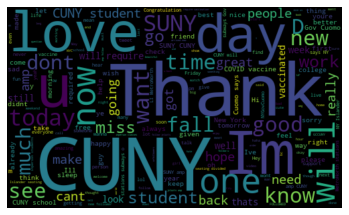

In [135]:
allWords = ''.join([twts for twts in tweets_final_df['tweet']])
wordCloud = WordCloud (width = 500,height = 300, random_state =21, max_font_size =110).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

C:\Users\Stelios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



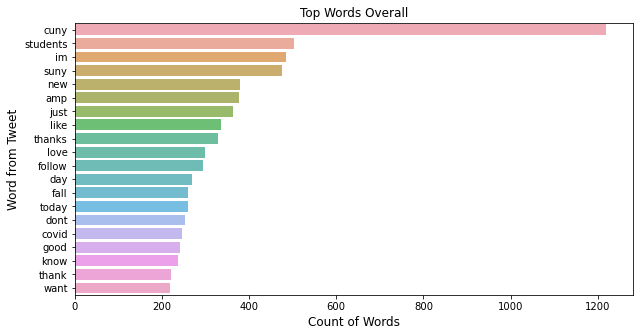

In [141]:
# note, this code will not run unless we run the word_counts code that is 4 cells below
df = pd.DataFrame()
df = word_counts[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

### Splitting dataset

In [20]:
x = tweets_final_df.tweet
y = tweets_final_df.label
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.7, random_state = 0)


### Data Modeling

### Using Bag of Words

In [21]:
count_vec = CountVectorizer(ngram_range = (1,1), stop_words = "english", lowercase = True)

In [22]:
train_counts = count_vec.fit_transform(x_train)

bag_train = pd.DataFrame(train_counts.toarray(), columns=count_vec.get_feature_names())

In [23]:
word_counts = bag_train.sum()
word_counts = word_counts.sort_values(ascending = False)
word_counts.head(30)

cuny            1219
students         503
im               484
suny             476
new              380
amp              378
just             362
like             336
thanks           329
love             299
follow           294
day              268
fall             261
today            259
dont             252
covid            245
good             242
know             236
thank            220
want             219
cuomo            214
time             212
miss             179
great            175
vaccinations     170
need             167
really           162
require          162
vaccine          160
happy            152
dtype: int64

### Model 1:

### Logistic Regression

#### Normalizing with word count of 20

In [24]:

reduced_bag_train = bag_train[word_counts[word_counts >= 20].index]
reduced_bag_train = (reduced_bag_train - reduced_bag_train.mean()) / reduced_bag_train.std()
val_counts = count_vec.transform(x_val)

bag_val = pd.DataFrame(val_counts.toarray(), columns=count_vec.get_feature_names())
reduced_bag_val = bag_val[reduced_bag_train.columns]
reduced_bag_val = (reduced_bag_val - reduced_bag_val.mean()) / reduced_bag_val.std()



In [25]:
reduced_bag_train

,cuny,students,im,suny,new,amp,just,like,thanks,love,...,gtlt,fback,rain,house,offer,office,started,second,question,special
0,-0.336354,-0.211671,-0.199231,-0.208039,5.088123,-0.176252,-0.177927,-0.16847,-0.172054,-0.157414,...,-0.042224,-0.042224,-0.040256,-0.040256,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224
1,-0.336354,-0.211671,-0.199231,-0.208039,-0.178087,-0.176252,-0.177927,-0.16847,-0.172054,-0.157414,...,-0.042224,-0.042224,-0.040256,-0.040256,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224
2,-0.336354,-0.211671,-0.199231,-0.208039,-0.178087,-0.176252,-0.177927,-0.16847,-0.172054,-0.157414,...,-0.042224,-0.042224,-0.040256,-0.040256,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224
3,-0.336354,-0.211671,-0.199231,-0.208039,-0.178087,-0.176252,-0.177927,-0.16847,-0.172054,-0.157414,...,-0.042224,-0.042224,-0.040256,-0.040256,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224
4,-0.336354,-0.211671,-0.199231,-0.208039,-0.178087,-0.176252,-0.177927,-0.16847,-0.172054,-0.157414,...,-0.042224,-0.042224,-0.040256,-0.040256,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11232,2.764226,4.517060,-0.199231,4.703177,5.088123,-0.176252,-0.177927,-0.16847,-0.172054,-0.157414,...,-0.042224,-0.042224,-0.040256,-0.040256,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224
11233,-0.336354,-0.211671,-0.199231,-0.208039,-0.178087,-0.176252,5.345168,-0.16847,-0.172054,-0.157414,...,-0.042224,-0.042224,-0.040256,-0.040256,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224
11234,-0.336354,-0.211671,-0.199231,-0.208039,-0.178087,-0.176252,5.345168,-0.16847,-0.172054,-0.157414,...,-0.042224,-0.042224,-0.040256,-0.040256,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224
11235,-0.336354,-0.211671,-0.199231,-0.208039,-0.178087,-0.176252,-0.177927,-0.16847,-0.172054,-0.157414,...,-0.042224,-0.042224,-0.040256,-0.040256,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224,-0.042224


In [27]:
logit_model = LogisticRegression(random_state = 123, max_iter= 1000).fit(reduced_bag_train, y_train)

In [28]:
y_train_prob = logit_model.predict_proba(reduced_bag_train)

#### AUC of training

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8388299881212035

In [30]:
y_val_prob = logit_model.predict_proba(reduced_bag_val)

#### AUC of validation 

In [31]:

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8013857381255967

#### Normalizing with word count of 30

In [32]:
# word count of 30 
reduced_bag_train = bag_train[word_counts[word_counts >= 30].index]
reduced_bag_train = (reduced_bag_train - reduced_bag_train.mean()) / reduced_bag_train.std()
val_counts = count_vec.transform(x_val)

bag_val = pd.DataFrame(val_counts.toarray(), columns=count_vec.get_feature_names())
reduced_bag_val = bag_val[reduced_bag_train.columns]
reduced_bag_val = (reduced_bag_val - reduced_bag_val.mean()) / reduced_bag_val.std()

#### AUC for training

In [34]:
logit_model = LogisticRegression(random_state = 123, max_iter=1000).fit(reduced_bag_train, y_train)
y_train_prob = logit_model.predict_proba(reduced_bag_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8118009678870265

#### AUC for validation

In [35]:
y_val_prob = logit_model.predict_proba(reduced_bag_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.786244524157802

#### Normalizing with word count of 40

In [36]:
# word count of 40
reduced_bag_train = bag_train[word_counts[word_counts >= 40].index]
reduced_bag_train = (reduced_bag_train - reduced_bag_train.mean()) / reduced_bag_train.std()
val_counts = count_vec.transform(x_val)

bag_val = pd.DataFrame(val_counts.toarray(), columns=count_vec.get_feature_names())
reduced_bag_val = bag_val[reduced_bag_train.columns]
reduced_bag_val = (reduced_bag_val - reduced_bag_val.mean()) / reduced_bag_val.std()

#### AUC for training set

In [37]:
logit_model = LogisticRegression(random_state = 123).fit(reduced_bag_train, y_train)
y_train_prob = logit_model.predict_proba(reduced_bag_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7905893830941269

#### AUC for validation set

In [38]:
y_val_prob = logit_model.predict_proba(reduced_bag_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7717344484555474

####  Normalizing with word count of 16

In [39]:
# Word_counts of 16 
reduced_bag_train = bag_train[word_counts[word_counts >= 16].index]
reduced_bag_train = (reduced_bag_train - reduced_bag_train.mean()) / reduced_bag_train.std()
val_counts = count_vec.transform(x_val)

bag_val = pd.DataFrame(val_counts.toarray(), columns=count_vec.get_feature_names())
reduced_bag_val = bag_val[reduced_bag_train.columns]
reduced_bag_val = (reduced_bag_val - reduced_bag_val.mean()) / reduced_bag_val.std()

#### AUC for training set

In [40]:
logit_model = LogisticRegression(random_state = 123, max_iter=1000).fit(reduced_bag_train, y_train)
y_train_prob = logit_model.predict_proba(reduced_bag_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8511276632300184

#### AUC for validation set

In [41]:
y_val_prob = logit_model.predict_proba(reduced_bag_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8014419177294054

### Model 2

### GridSearch

In [42]:

reduced_bag_train = bag_train[word_counts[word_counts >= 20].index]
reduced_bag_train = (reduced_bag_train - reduced_bag_train.mean()) / reduced_bag_train.std()
val_counts = count_vec.transform(x_val)

bag_val = pd.DataFrame(val_counts.toarray(), columns=count_vec.get_feature_names())
reduced_bag_val = bag_val[reduced_bag_train.columns]
reduced_bag_val = (reduced_bag_val - reduced_bag_val.mean()) / reduced_bag_val.std()




In [43]:
parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(10, 110, 5)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, scoring = "roc_auc")
clf.fit(reduced_bag_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': range(2, 8),
                         'min_samples_leaf': range(5, 55, 5),
                         'min_samples_split': range(10, 110, 5)},
             scoring='roc_auc')

#### AUC for training set

In [44]:
y_train_prob = clf.predict_proba(reduced_bag_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.6288411974872519

#### AUC for validation set

In [45]:
y_val_prob = clf.predict_proba(reduced_bag_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.6240630691880911

[Text(400.41666666666663, 637.03125, 'X[0] <= 1.214\ngini = 0.441\nsamples = 11237\nvalue = [3689, 7548]'),
 Text(271.25, 552.09375, 'X[22] <= 3.823\ngini = 0.459\nsamples = 10059\nvalue = [3595, 6464]'),
 Text(245.41666666666666, 467.15625, 'X[2] <= 2.114\ngini = 0.454\nsamples = 9882\nvalue = [3438, 6444]'),
 Text(155.0, 382.21875, 'X[62] <= 5.206\ngini = 0.446\nsamples = 9473\nvalue = [3179, 6294]'),
 Text(129.16666666666666, 297.28125, 'X[14] <= 3.174\ngini = 0.443\nsamples = 9399\nvalue = [3109, 6290]'),
 Text(77.5, 212.34375, 'X[48] <= 4.869\ngini = 0.438\nsamples = 9203\nvalue = [2977, 6226]'),
 Text(51.666666666666664, 127.40625, 'X[139] <= 7.029\ngini = 0.435\nsamples = 9135\nvalue = [2919, 6216]'),
 Text(25.833333333333332, 42.46875, 'gini = 0.432\nsamples = 9082\nvalue = [2871, 6211]'),
 Text(77.5, 42.46875, 'gini = 0.171\nsamples = 53\nvalue = [48, 5]'),
 Text(103.33333333333333, 127.40625, 'gini = 0.251\nsamples = 68\nvalue = [58, 10]'),
 Text(180.83333333333331, 212.34375

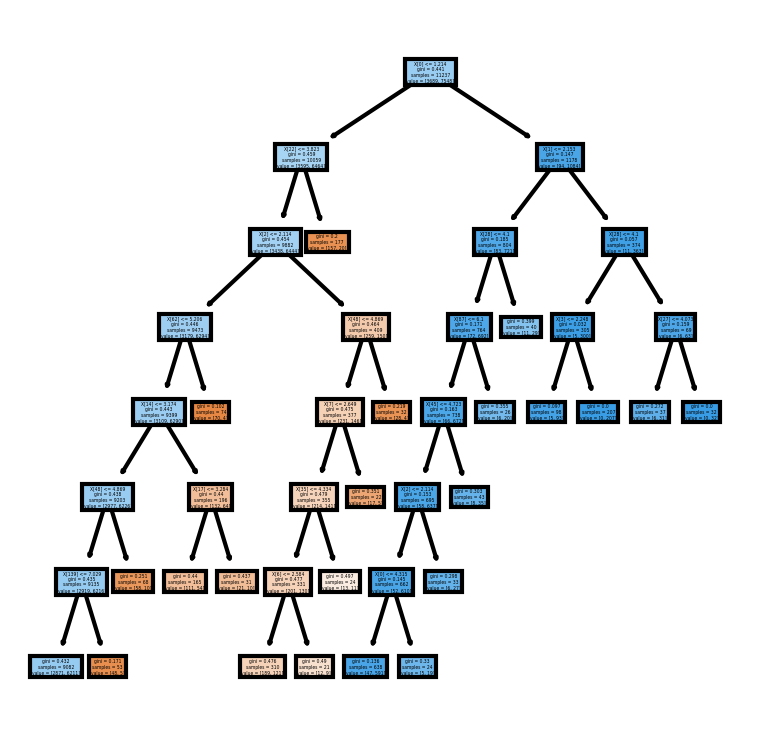

In [46]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
plot_tree(clf.best_estimator_, filled=True)

### Model 3

### Random Forest

In [47]:
# doing random forest with 20 words - good performance
parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(10, 110, 5),
              "max_samples":[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], "max_features": [2, 3, 4, 5, 6],
              "n_estimators": [100, 150, 200, 250, 300, 350, 400]}
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=4, scoring = "roc_auc", n_iter = 100,
                        random_state = 0)

clf.fit(reduced_bag_train, y_train)



RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'max_depth': range(2, 8),
                                        'max_features': [2, 3, 4, 5, 6],
                                        'max_samples': [0.1, 0.15, 0.2, 0.25,
                                                        0.3, 0.35, 0.4],
                                        'min_samples_leaf': range(5, 55, 5),
                                        'min_samples_split': range(10, 110, 5),
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=0, scoring='roc_auc')

#### AUC for training set

In [48]:
y_train_prob = clf.predict_proba(reduced_bag_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8095366486509472

#### AUC for validation set

In [49]:
y_val_prob = clf.predict_proba(reduced_bag_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7905138879032818

### Rerunning Random Forest with 30 words

In [50]:
reduced_bag_train = bag_train[word_counts[word_counts >= 30].index]
reduced_bag_train = (reduced_bag_train - reduced_bag_train.mean()) / reduced_bag_train.std()
val_counts = count_vec.transform(x_val)

bag_val = pd.DataFrame(val_counts.toarray(), columns=count_vec.get_feature_names())
reduced_bag_val = bag_val[reduced_bag_train.columns]
reduced_bag_val = (reduced_bag_val - reduced_bag_val.mean()) / reduced_bag_val.std()

In [51]:
parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(10, 110, 5),
              "max_samples":[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], "max_features": [2, 3, 4, 5, 6],
              "n_estimators": [100, 150, 200, 250, 300, 350, 400]}
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=4, scoring = "roc_auc", n_iter = 100,
                        random_state = 0)

clf.fit(reduced_bag_train, y_train)



RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'max_depth': range(2, 8),
                                        'max_features': [2, 3, 4, 5, 6],
                                        'max_samples': [0.1, 0.15, 0.2, 0.25,
                                                        0.3, 0.35, 0.4],
                                        'min_samples_leaf': range(5, 55, 5),
                                        'min_samples_split': range(10, 110, 5),
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=0, scoring='roc_auc')

#### AUC for training set

In [52]:
# as before it seems that a lower word occurence count provides better results, though 30 in this case does fit better
y_train_prob = clf.predict_proba(reduced_bag_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7941820222627233

#### AUC for validation set

In [53]:
y_val_prob = clf.predict_proba(reduced_bag_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7784417590148711

### Model 4

### XGBoost

### Xgboost with word_counts= 20

In [54]:
reduced_bag_train = bag_train[word_counts[word_counts >= 20].index]
reduced_bag_train = (reduced_bag_train - reduced_bag_train.mean()) / reduced_bag_train.std()
val_counts = count_vec.transform(x_val)

bag_val = pd.DataFrame(val_counts.toarray(), columns=count_vec.get_feature_names())
reduced_bag_val = bag_val[reduced_bag_train.columns]
reduced_bag_val = (reduced_bag_val - reduced_bag_val.mean()) / reduced_bag_val.std()


In [55]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'lambda': [0.1, 0.25, 0.5, 0.75, 1]}
clf = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss"), 
                         parameters, n_jobs=4, scoring = "roc_auc", n_iter = 100,
                         random_state = 123)

clf.fit(reduced_bag_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   n_iter=100, n_jobs=4,
                   param_distributions={'colsample_bynode': [0.2, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 1],
    

#### AUC for training set

In [56]:
y_train_prob = clf.predict_proba(reduced_bag_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8335128297177633

#### AUC for validation set

In [57]:
y_val_prob = clf.predict_proba(reduced_bag_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8083510551845857

### Xgboost with word_counts= 30

In [58]:
reduced_bag_train = bag_train[word_counts[word_counts >= 30].index]
reduced_bag_train = (reduced_bag_train - reduced_bag_train.mean()) / reduced_bag_train.std()
val_counts = count_vec.transform(x_val)

bag_val = pd.DataFrame(val_counts.toarray(), columns=count_vec.get_feature_names())
reduced_bag_val = bag_val[reduced_bag_train.columns]
reduced_bag_val = (reduced_bag_val - reduced_bag_val.mean()) / reduced_bag_val.std()

In [59]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'lambda': [0.1, 0.25, 0.5, 0.75, 1]}
clf = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss"), 
                         parameters, n_jobs=4, scoring = "roc_auc", n_iter = 100,
                         random_state = 123)

clf.fit(reduced_bag_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   n_iter=100, n_jobs=4,
                   param_distributions={'colsample_bynode': [0.2, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 1],
    

In [60]:
y_train_prob = clf.predict_proba(reduced_bag_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8160195459280178

In [61]:
y_val_prob = clf.predict_proba(reduced_bag_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7934400917492096

# TF-IDF

#### Here we'll be redoing all of the above but with TF-IDF to see if it can give us a better result

In [62]:

tf_idf = TfidfVectorizer(ngram_range = (1,1), stop_words = "english", lowercase = True)

In [63]:
train_tf_idf = tf_idf.fit_transform(x_train)

train_tf_idf = pd.DataFrame(train_tf_idf.toarray(), columns = tf_idf.get_feature_names())

#### Running it with 20 words


In [112]:
reduced_tf_idf_train = train_tf_idf[word_counts[word_counts >= 20].index]
reduced_tf_idf_train = (reduced_tf_idf_train - reduced_tf_idf_train.mean()) / reduced_tf_idf_train.std()
val_counts = tf_idf.transform(x_val)

tf_idf_val = pd.DataFrame(val_counts.toarray(), columns=tf_idf.get_feature_names())
reduced_tf_idf_val = tf_idf_val[reduced_tf_idf_train.columns]
reduced_tf_idf_val = (reduced_tf_idf_val - reduced_tf_idf_val.mean()) / reduced_tf_idf_val.std()

### Model 1

### Logistic Regression

In [113]:
logit_model = LogisticRegression(random_state = 123, max_iter=1000).fit(reduced_tf_idf_train, y_train)

#### AUC for training set

In [114]:
y_train_prob = logit_model.predict_proba(reduced_tf_idf_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8419820746391793

#### AUC for validation set

In [115]:
y_val_prob = logit_model.predict_proba(reduced_tf_idf_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8040573691997659

#### Running it with 30 words

In [116]:
# seems to be optimal with the least amount of overfitting
reduced_tf_idf_train = train_tf_idf[word_counts[word_counts >= 30].index]
reduced_tf_idf_train = (reduced_tf_idf_train - reduced_tf_idf_train.mean()) / reduced_tf_idf_train.std()
val_counts = tf_idf.transform(x_val)

tf_idf_val = pd.DataFrame(val_counts.toarray(), columns=tf_idf.get_feature_names())
reduced_tf_idf_val = tf_idf_val[reduced_tf_idf_train.columns]
reduced_tf_idf_val = (reduced_tf_idf_val - reduced_tf_idf_val.mean()) / reduced_tf_idf_val.std()

#### AUC for training set

In [117]:
logit_model = LogisticRegression(random_state = 123,max_iter=1000).fit(reduced_tf_idf_train, y_train)
y_train_prob = logit_model.predict_proba(reduced_tf_idf_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8157761232602175

#### AUC for validation set

In [118]:
y_val_prob = logit_model.predict_proba(reduced_tf_idf_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7904612374087104

### Model 2

### GridSearch

In [71]:
#word count= 30
parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(10, 110, 5)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, scoring = "roc_auc")
clf.fit(reduced_tf_idf_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': range(2, 8),
                         'min_samples_leaf': range(5, 55, 5),
                         'min_samples_split': range(10, 110, 5)},
             scoring='roc_auc')

#### AUC for training set

In [72]:
y_train_prob = clf.predict_proba(reduced_tf_idf_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.6308771957421361

#### AUC for validation set

In [73]:
y_val_prob = clf.predict_proba(reduced_tf_idf_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.6164294151445715

[Text(420.1953125, 637.03125, 'X[0] <= 0.411\ngini = 0.441\nsamples = 11237\nvalue = [3689, 7548]'),
 Text(261.5625, 552.09375, 'X[22] <= 1.406\ngini = 0.459\nsamples = 10059\nvalue = [3595, 6464]'),
 Text(193.75, 467.15625, 'X[2] <= 1.157\ngini = 0.454\nsamples = 9882\nvalue = [3438, 6444]'),
 Text(116.25, 382.21875, 'X[62] <= 2.501\ngini = 0.446\nsamples = 9473\nvalue = [3179, 6294]'),
 Text(96.875, 297.28125, 'X[14] <= 5.018\ngini = 0.443\nsamples = 9399\nvalue = [3109, 6290]'),
 Text(58.125, 212.34375, 'X[19] <= 5.209\ngini = 0.438\nsamples = 9249\nvalue = [2998, 6251]'),
 Text(38.75, 127.40625, 'X[48] <= 2.666\ngini = 0.434\nsamples = 9145\nvalue = [2917, 6228]'),
 Text(19.375, 42.46875, 'gini = 0.432\nsamples = 9077\nvalue = [2859, 6218]'),
 Text(58.125, 42.46875, 'gini = 0.251\nsamples = 68\nvalue = [58, 10]'),
 Text(77.5, 127.40625, 'gini = 0.344\nsamples = 104\nvalue = [81, 23]'),
 Text(135.625, 212.34375, 'X[14] <= 6.81\ngini = 0.385\nsamples = 150\nvalue = [111, 39]'),
 Text

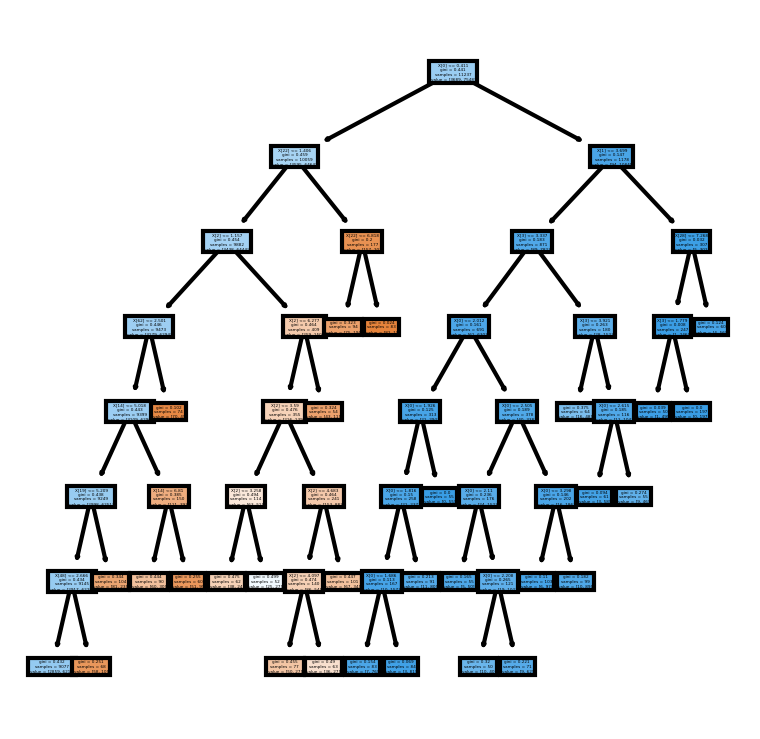

In [74]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
plot_tree(clf.best_estimator_, filled=True)

### Model 3

### Random Forest

#### Running it with 30 words

In [75]:
reduced_tf_idf_train = train_tf_idf[word_counts[word_counts >= 30].index]
reduced_tf_idf_train = (reduced_tf_idf_train - reduced_tf_idf_train.mean()) / reduced_tf_idf_train.std()
val_counts = tf_idf.transform(x_val)

tf_idf_val = pd.DataFrame(val_counts.toarray(), columns=tf_idf.get_feature_names())
reduced_tf_idf_val = tf_idf_val[reduced_tf_idf_train.columns]
reduced_tf_idf_val = (reduced_tf_idf_val - reduced_tf_idf_val.mean()) / reduced_tf_idf_val.std()

In [76]:
parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(10, 110, 5),
              "max_samples":[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], "max_features": [2, 3, 4, 5, 6],
              "n_estimators": [100, 150, 200, 250, 300, 350, 400]}
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=4, scoring = "roc_auc", n_iter = 100,
                        random_state = 0)

clf.fit(reduced_tf_idf_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'max_depth': range(2, 8),
                                        'max_features': [2, 3, 4, 5, 6],
                                        'max_samples': [0.1, 0.15, 0.2, 0.25,
                                                        0.3, 0.35, 0.4],
                                        'min_samples_leaf': range(5, 55, 5),
                                        'min_samples_split': range(10, 110, 5),
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=0, scoring='roc_auc')

#### AUC for training set

In [77]:
y_train_prob = clf.predict_proba(reduced_tf_idf_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8067419028742838

#### AUC for validation set

In [78]:
y_val_prob = clf.predict_proba(reduced_tf_idf_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7794312449400205

#### Running it with 20 words

In [79]:
reduced_tf_idf_train = train_tf_idf[word_counts[word_counts >= 20].index]
reduced_tf_idf_train = (reduced_tf_idf_train - reduced_tf_idf_train.mean()) / reduced_tf_idf_train.std()
val_counts = tf_idf.transform(x_val)

tf_idf_val = pd.DataFrame(val_counts.toarray(), columns=tf_idf.get_feature_names())
reduced_tf_idf_val = tf_idf_val[reduced_tf_idf_train.columns]
reduced_tf_idf_val = (reduced_tf_idf_val - reduced_tf_idf_val.mean()) / reduced_tf_idf_val.std()

In [80]:
parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(10, 110, 5),
              "max_samples":[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], "max_features": [2, 3, 4, 5, 6],
              "n_estimators": [100, 150, 200, 250, 300, 350, 400]}
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=4, scoring = "roc_auc", n_iter = 100,
                        random_state = 0)

clf.fit(reduced_tf_idf_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'max_depth': range(2, 8),
                                        'max_features': [2, 3, 4, 5, 6],
                                        'max_samples': [0.1, 0.15, 0.2, 0.25,
                                                        0.3, 0.35, 0.4],
                                        'min_samples_leaf': range(5, 55, 5),
                                        'min_samples_split': range(10, 110, 5),
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=0, scoring='roc_auc')

#### AUC for training set

In [81]:
y_train_prob = clf.predict_proba(reduced_tf_idf_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8214980104560414

#### AUC for validation set

In [82]:
y_val_prob = clf.predict_proba(reduced_tf_idf_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7903914182746051

#### Running it with 15 words

In [83]:
reduced_tf_idf_train = train_tf_idf[word_counts[word_counts >= 15].index]
reduced_tf_idf_train = (reduced_tf_idf_train - reduced_tf_idf_train.mean()) / reduced_tf_idf_train.std()
val_counts = tf_idf.transform(x_val)

tf_idf_val = pd.DataFrame(val_counts.toarray(), columns=tf_idf.get_feature_names())
reduced_tf_idf_val = tf_idf_val[reduced_tf_idf_train.columns]
reduced_tf_idf_val = (reduced_tf_idf_val - reduced_tf_idf_val.mean()) / reduced_tf_idf_val.std()

In [84]:
parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(10, 110, 5),
              "max_samples":[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], "max_features": [2, 3, 4, 5, 6],
              "n_estimators": [100, 150, 200, 250, 300, 350, 400]}
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=4, scoring = "roc_auc", n_iter = 100,
                        random_state = 0)

clf.fit(reduced_tf_idf_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'max_depth': range(2, 8),
                                        'max_features': [2, 3, 4, 5, 6],
                                        'max_samples': [0.1, 0.15, 0.2, 0.25,
                                                        0.3, 0.35, 0.4],
                                        'min_samples_leaf': range(5, 55, 5),
                                        'min_samples_split': range(10, 110, 5),
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=0, scoring='roc_auc')

#### AUC for training set

In [85]:
y_train_prob = clf.predict_proba(reduced_tf_idf_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8205949978329709

#### AUC for validation set

In [86]:
y_val_prob = clf.predict_proba(reduced_tf_idf_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7901816747282968

### Model 4

### XG BOOST

#### Running it with 15 words

In [87]:
reduced_tf_idf_train = train_tf_idf[word_counts[word_counts >= 15].index]
reduced_tf_idf_train = (reduced_tf_idf_train - reduced_tf_idf_train.mean()) / reduced_tf_idf_train.std()
val_counts = tf_idf.transform(x_val)

tf_idf_val = pd.DataFrame(val_counts.toarray(), columns=tf_idf.get_feature_names())
reduced_tf_idf_val = tf_idf_val[reduced_tf_idf_train.columns]
reduced_tf_idf_val = (reduced_tf_idf_val - reduced_tf_idf_val.mean()) / reduced_tf_idf_val.std()

In [88]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'lambda': [0.1, 0.25, 0.5, 0.75, 1]}
clf = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss"), 
                         parameters, n_jobs=4, scoring = "roc_auc", n_iter = 100,
                         random_state = 123)

clf.fit(reduced_tf_idf_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   n_iter=100, n_jobs=4,
                   param_distributions={'colsample_bynode': [0.2, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 1],
    

#### AUC for training set

In [89]:
y_train_prob = clf.predict_proba(reduced_tf_idf_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8660790512420159

#### AUC for validation set

In [90]:
y_val_prob = clf.predict_proba(reduced_tf_idf_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8036808990873152

#### Running it with 20 words

In [91]:
reduced_tf_idf_train = train_tf_idf[word_counts[word_counts >= 20].index]
reduced_tf_idf_train = (reduced_tf_idf_train - reduced_tf_idf_train.mean()) / reduced_tf_idf_train.std()
val_counts = tf_idf.transform(x_val)

tf_idf_val = pd.DataFrame(val_counts.toarray(), columns=tf_idf.get_feature_names())
reduced_tf_idf_val = tf_idf_val[reduced_tf_idf_train.columns]
reduced_tf_idf_val = (reduced_tf_idf_val - reduced_tf_idf_val.mean()) / reduced_tf_idf_val.std()

In [92]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'lambda': [0.1, 0.25, 0.5, 0.75, 1]}
clf = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss"), 
                         parameters, n_jobs=4, scoring = "roc_auc", n_iter = 100,
                         random_state = 123)

clf.fit(reduced_tf_idf_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   n_iter=100, n_jobs=4,
                   param_distributions={'colsample_bynode': [0.2, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 1],
    

#### AUC for training set

In [93]:
y_train_prob = clf.predict_proba(reduced_tf_idf_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8577371920099903

#### AUC for validation set

In [94]:
y_val_prob = clf.predict_proba(reduced_tf_idf_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7906995953542424

#### Running it with 30 words

In [95]:
reduced_tf_idf_train = train_tf_idf[word_counts[word_counts >= 30].index]
reduced_tf_idf_train = (reduced_tf_idf_train - reduced_tf_idf_train.mean()) / reduced_tf_idf_train.std()
val_counts = tf_idf.transform(x_val)

tf_idf_val = pd.DataFrame(val_counts.toarray(), columns=tf_idf.get_feature_names())
reduced_tf_idf_val = tf_idf_val[reduced_tf_idf_train.columns]
reduced_tf_idf_val = (reduced_tf_idf_val - reduced_tf_idf_val.mean()) / reduced_tf_idf_val.std()

In [96]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'lambda': [0.1, 0.25, 0.5, 0.75, 1]}
clf = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss"), 
                         parameters, n_jobs=4, scoring = "roc_auc", n_iter = 100,
                         random_state = 123)

clf.fit(reduced_tf_idf_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   n_iter=100, n_jobs=4,
                   param_distributions={'colsample_bynode': [0.2, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 1],
    

#### AUC for training set

In [97]:
y_train_prob = clf.predict_proba(reduced_tf_idf_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8362724339953942

#### AUC for validation set

In [98]:
y_val_prob = clf.predict_proba(reduced_tf_idf_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.7774248032664672

# Using NLTK to Normalize, Remove Noise and Tokenize tweets

In [99]:
# The function that normalizes a sentence, you should first generate the tags for each token in the text, and then lemmatize each word using the tag.
# This code imports the WordNetLemmatizer class and initializes it to a variable, lemmatizer
#The function lemmatize_sentence first gets the position tag of each token of a tweet. 
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    # Within the if statement, if the tag starts with NN, the token is assigned as a noun. Similarly, if the tag starts with VB, the token is assigned as a verb
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [100]:
from nltk.corpus import twitter_samples

#tagging algorithm, which assesses the relative position of a word in a sentence giving a part-of-speech tag used in the Penn Treebank Project - https://tinyurl.com/s5jcjhrf
from nltk.tag import pos_tag

# normalizes
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
from nltk.corpus import stopwords

# You can find out which words are the most common words using the FreqDist class of NLTK.
from nltk import FreqDist

# To avoid bias, you’ve added code to randomly arrange the data 
import random

#Building and Testing the Model
from nltk import classify
from nltk import NaiveBayesClassifier
from nltk.tokenize import word_tokenize

# Removing Noise from the Data - Noise is any part of the text that does not add meaning or information to data.
# the most common words in a language are called stop words. Some examples of stop words are “is”, “the”, and “a”. 
# They are generally irrelevant when processing language, unless a specific use case warrants their inclusion

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []
    
    # To remove hyperlinks, you need to first search for a substring that matches a URL starting with http:// or https://, followed by letters, numbers, or special characters. 
    # Once a pattern is matched, the .sub() method replaces it with an empty string.
    # Arguments: the tweet tokens and the tuple of stop words
    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

    # We will normalize word forms within the remove_noise() function, you can comment out the lemmatize_sentence() function from the script.
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

#Finally, remove punctuation using the library. You will also remove stop words using a built-in set of stop words in NLTK
# You can use the .words() method to get a list of stop words in English.
stop_words = stopwords.words('english')

#Notice that the function removes all @ mentions, stop words, and converts the words to lowercase.
#print(remove_noise(tweet_tokens[0], stop_words))

positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

# Use the remove_noise() function to clean the positive and negative tweets. 
for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

In [101]:
# Now that you’ve added the code to clean the sample tweets, you may want to compare the original tokens to the cleaned tokens for a sample tweet. 
# If you’d like to test this, add the following code to the file to compare both versions of the 500th tweet in the list:
print(positive_tweet_tokens[500])
print(positive_cleaned_tokens_list[500])

['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht']
['dang', 'rad', '#fanart', ':d']


In [102]:
# Determining Word Density

# The following snippet defines a generator function, that takes a list of tweets as an argument to provide a list of words in all of the tweet tokens joined
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)

# Now that you have compiled all words in the sample of tweets, you can find out which are the most common words using the FreqDist class of NLTK
freq_dist_pos = FreqDist(all_pos_words)
#The .most_common() method lists the words which occur most frequently in the data
print(freq_dist_pos.most_common(10))
#From this data, you can see that emoticon entities form some of the most common parts of positive tweets


[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


In [103]:
# Preparing Data for the Model - Converting Tokens to a Dictionary
# You will use the Naive Bayes classifier in NLTK to perform the modeling exercise. 
# Notice that the model requires not just a list of words in a tweet, but a Python dictionary with words as keys and True as values. 
# The following function makes a generator function to change the format of the cleaned data.

# Add the following code to convert the tweets from a list of cleaned tokens to dictionaries with keys as the tokens and True as values. 
# The corresponding dictionaries are stored in positive_tokens_for_model and negative_tokens_for_model.
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

#Splitting the Dataset for Training and Testing the Model
# Prepare the data for training the NaiveBayesClassifier class.

# This  attaches a Positive or Negative label to each tweet. It then creates a dataset by joining the positive and negative tweets.
positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

# To avoid bias, you’ve added code to randomly arrange the data using the .shuffle() method of random.
dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

# The code splits the shuffled data into a ratio of 70:30 for training and testing, respectively. Since the number of tweets is 10000, 
# you can use the first 7000 tweets from the shuffled dataset for training the model and the final 3000 for testing the model.
train_data_clean = dataset[:7000]
test_data_clean = dataset[7000:]

# NLTK path of classifiction 

### Model 1 NaiveBayesClassifier from NLTK

In [104]:
#Building and Testing the Model

classifier = NaiveBayesClassifier.train(train_data_clean)

# Accuracy is defined as the percentage of tweets in the testing dataset for which the model was correctly able to predict the sentiment. 
print("Accuracy (percent):", classify.accuracy(classifier, test_data_clean)*100)

# In the table that shows the most informative features, every row in the output shows the ratio of occurrence of a token in positive and negative tagged tweets
classifier.show_most_informative_features(10)

Accuracy (percent): 99.23333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2089.4 : 1.0
                      :) = True           Positi : Negati =    991.2 : 1.0
                     sad = True           Negati : Positi =     24.3 : 1.0
                follower = True           Positi : Negati =     24.0 : 1.0
                    glad = True           Positi : Negati =     19.5 : 1.0
                    sick = True           Negati : Positi =     16.4 : 1.0
               community = True           Positi : Negati =     16.2 : 1.0
                  arrive = True           Positi : Negati =     14.6 : 1.0
                    blog = True           Positi : Negati =     12.9 : 1.0
                 awesome = True           Positi : Negati =     12.1 : 1.0


### Model 2 Classifiers for NLTK from Sklearn

In [105]:
# from nltk to wrap the Sklearn algos in NLTK classifier
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC


In [129]:
print("Original Naive Bayes Algo accuracy percent:", classify.accuracy(classifier, test_data_clean)*100)
classifier.show_most_informative_features(15)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(train_data_clean)
print("MNB_classifier accuracy percent:", (classify.accuracy(MNB_classifier, test_data_clean))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(train_data_clean)
print("BernoulliNB_classifier accuracy percent:", (classify.accuracy(BernoulliNB_classifier, test_data_clean))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(train_data_clean)
print("LogisticRegression_classifier accuracy percent:", (classify.accuracy(LogisticRegression_classifier, test_data_clean))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(train_data_clean)
print("SGDClassifier_classifier accuracy percent:", (classify.accuracy(SGDClassifier_classifier, test_data_clean))*100)

SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(train_data_clean)
print("SVC_classifier accuracy percent:", (classify.accuracy(SVC_classifier, test_data_clean))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(train_data_clean)
print("LinearSVC_classifier accuracy percent:", (classify.accuracy(LinearSVC_classifier, test_data_clean))*100)

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(train_data_clean)
print("NuSVC_classifier accuracy percent:", (classify.accuracy(NuSVC_classifier, test_data_clean))*100)

Original Naive Bayes Algo accuracy percent: 99.23333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2089.4 : 1.0
                      :) = True           Positi : Negati =    991.2 : 1.0
                     sad = True           Negati : Positi =     24.3 : 1.0
                follower = True           Positi : Negati =     24.0 : 1.0
                    glad = True           Positi : Negati =     19.5 : 1.0
                    sick = True           Negati : Positi =     16.4 : 1.0
               community = True           Positi : Negati =     16.2 : 1.0
                  arrive = True           Positi : Negati =     14.6 : 1.0
                    blog = True           Positi : Negati =     12.9 : 1.0
                 awesome = True           Positi : Negati =     12.1 : 1.0
                   didnt = True           Negati : Positi =     11.7 : 1.0
               goodnight = True           Positi : Negati =     11.6 : 1.0
            

### Model 3 - Taking BernoulliNB_classifier the most consistant best performing classifier from above 


In [107]:
custom_tweet = "This is a test and i love this class."

custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(BernoulliNB_classifier.classify(dict([token, True] for token in custom_tokens)))

Positive


In [108]:
custom_tweet = "This is a test and I dont know how i feel this class."

custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(BernoulliNB_classifier.classify(dict([token, True] for token in custom_tokens)))

Negative
